# Getting started with Dqlmagic

## Load Dqlmagic and authenticate

In [ ]:
%reload_ext dqlmagic
%auth_grail 

## Run first queries

### Cell query returning raw response

In [13]:
%%dql_raw
fetch logs, from:-10m | limit 2


b'{"batches":[{"types":{"content":"string","timestamp":"timestamp","dt.entity.cloud_application":"string","dt.entity.cloud_application_instance":"string","dt.entity.cloud_application_namespace":"string","dt.entity.container_group":"string","dt.entity.container_group_instance":"string","dt.entity.host":"string","dt.entity.kubernetes_cluster":"string","dt.entity.kubernetes_node":"string","dt.entity.process_group":"string","dt.entity.process_group_instance":"string","dt.kubernetes.cluster.name":"string","dt.kubernetes.node.system_uuid":"string","dt.process.name":"string","dt.source_entity":"string","event.type":"string","host.name":"string","k8s.container.name":"string","k8s.deployment.name":"string","k8s.namespace.name":"string","k8s.pod.name":"string","k8s.pod.uid":"string","log.source":"string","loglevel":"string","process.technology":"string","status":"string","log.iostream":"string"},"records":[{"content":"{\\"instant\\":{\\"epochSecond\\":1671651427,\\"nanoOfSecond\\":144586000},\\"

In [14]:
%dql fetch logs, from:-10m | limit 2

[{'content': '{"instant":{"epochSecond":1671651427,"nanoOfSecond":144586000},"thread":"unleash-api-executor","level":"INFO","loggerName":"hipstershop.AdService","message":"Fetched toggles. Status: NOT_CHANGED","endOfBatch":false,"loggerFqcn":"org.apache.logging.log4j.spi.AbstractLogger","threadId":47,"threadPriority":5,"logging.googleapis.com/trace":"00000000000000000000000000000000","logging.googleapis.com/spanId":"0000000000000000","logging.googleapis.com/traceSampled":"false","time":"2022-12-21T19:37:07.144Z"}',
  'timestamp': '2022-12-21T19:37:07.144000000Z',
  'dt.entity.cloud_application': 'CLOUD_APPLICATION-C8BA01269BC6E499',
  'dt.entity.cloud_application_instance': 'CLOUD_APPLICATION_INSTANCE-B5E1E73FC1ECE1B9',
  'dt.entity.cloud_application_namespace': 'CLOUD_APPLICATION_NAMESPACE-71999F15315935CF',
  'dt.entity.container_group': 'CONTAINER_GROUP-5C0AB02A5A2BF5F6',
  'dt.entity.container_group_instance': 'CONTAINER_GROUP_INSTANCE-467018F5831B2B4C',
  'dt.entity.host': 'HOST-0

### Output result as table using panda

But first install required python lib

In [ ]:
pip install pandas

In [11]:
import pandas as pd

res=%dql fetch logs, from:-2h | limit 200

df = pd.DataFrame(res)
df.style


,content,timestamp,dt.entity.host,dt.entity.kubernetes_cluster,dt.entity.process_group_instance,dt.kubernetes.cluster.id,dt.kubernetes.workload.kind,dt.kubernetes.workload.name,dt.source_entity,event.type,loglevel,status,dt.auth.origin,istio.canonical_revision,istio.canonical_service,span_id,trace_id,trace_sampled
0,Fetching cart of user: someone@example.com,2023-04-26T12:07:46.528000000Z,HOST-AD30753C9D5538EC,KUBERNETES_CLUSTER-DEF2FDD4656A650A,PROCESS_GROUP_INSTANCE-10A7EA993CACE0EB,5336480e-d21c-4bb8-ac30-294f59d92358,Deployment,cartservice,PROCESS_GROUP_INSTANCE-10A7EA993CACE0EB,LOG,INFO,INFO,dt0c01.RKJF375EW4EV5K55RGHTQHB5,v1,cartservice,30783bb5d6da84e2,f13400255c960f1b9e7306fcbc6fa413,true


### Aggregate logs by loglevel using panda lib

<AxesSubplot:xlabel='loglevel'>

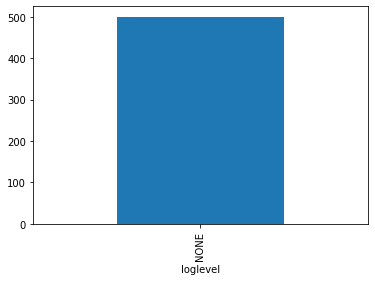

In [16]:
import pandas as pd

res = %dql fetch logs, from:-30m | limit 500

df = pd.DataFrame(res)

loglevel = df["loglevel"].squeeze()
count = df["content"].groupby(loglevel).count()

count.plot(kind="bar")


### Aggregate logs by loglevel using DQL

But first install an alternative charting library

In [ ]:
pip install plotly

In [24]:
import plotly.express as px
import pandas as pd

res = %dql fetch logs, from:-3h | limit 50000 | summarize Count = count(), by: loglevel

df = pd.DataFrame(res)

fig = px.bar(df, x="loglevel", y="Count", title="Number of logs by loglevel", width=400, height=300)
fig.show()



### Aggregate logs by loglevel over time


In [22]:
import plotly.express as px
import pandas as pd

res = %dql fetch logs, from:-1h | limit 50000 | summarize Count = count(), by:{bin(timestamp, 15m), loglevel}

df = pd.DataFrame(res)

fig = px.bar(df, x="bin(timestamp, 15m)", y="Count", color="loglevel", title="Number of logs by loglevel", width=400, height=300)

fig.show()